# Question 3:

Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes - id: Identification Number - int 
num: Number of the

● Pokémon in the official Pokédex - int name: Pokémon name -

● string img: URL to an image of this Pokémon - string type:

● Pokémon type -string height: Pokémon height - float

● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given

● when transferred - string candy_count: the amount of candies required to evolve - int

● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:

● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int

● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of

● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [ ]:
# Importing Data
import pandas as pd

data = pd.read_json('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')
df = pd.DataFrame(data.pokemon.values.tolist())
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(1), object(13)

In [ ]:
# Cleaning the columns by meoving extra strings

df['height'] = df['height'].str.replace('m', '')
df['weight'] = df['weight'].str.replace('kg', '')
df['egg'] = df['egg'].str.replace('km', '')
df['egg'] = df['egg'].replace(['Not in Eggs','Omanyte Candy'],[0,0])

In [ ]:
# Replacing NA with 0

df.fillna(0,inplace = True)

In [ ]:
# Converting the Columns into their respective data type

float_type = ['height','weight','egg','spawn_chance']
int_type = ['id','num','candy_count','avg_spawns',]

for i in float_type:
  df[i] = df[i].astype(float)

for j in int_type:
  df[j] = df[j].astype(int)

In [ ]:
# Cleaning time column
df['spawn_time'].replace(["N/A"], ['00:00'], inplace = True)

# Converting into datetime format
df['spawn_time'] = pd.to_datetime(df['spawn_time'],format="%M:%S")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              151 non-null    int64         
 1   num             151 non-null    int64         
 2   name            151 non-null    object        
 3   img             151 non-null    object        
 4   type            151 non-null    object        
 5   height          151 non-null    float64       
 6   weight          151 non-null    float64       
 7   candy           151 non-null    object        
 8   candy_count     151 non-null    int64         
 9   egg             151 non-null    float64       
 10  spawn_chance    151 non-null    float64       
 11  avg_spawns      151 non-null    int64         
 12  spawn_time      151 non-null    datetime64[ns]
 13  multipliers     151 non-null    object        
 14  weaknesses      151 non-null    object        
 15  next_e

In [ ]:
# Export the DataFrame to an Excel file

df.to_excel("Pokemon.xlsx", index=False)

# Question 6:


Using the data from Question 3, write code to analyze the data and answer the following questions Note 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -

- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

- Get all Pokemon who have more than two types of capabilities

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness len,spawn_seconds,type len
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,1900-01-01 00:20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",0,4,1200.0,2
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99,13.0,Bulbasaur Candy,100,0.0,0.042,4,1900-01-01 00:07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,420.0,2


In [ ]:
# Get all Pokemons whose spawn rate is less than 5%
spawn_rate = df[['name','spawn_chance']][df['spawn_chance'] < 0.05].sort_values(by = 'spawn_chance',ascending = False)

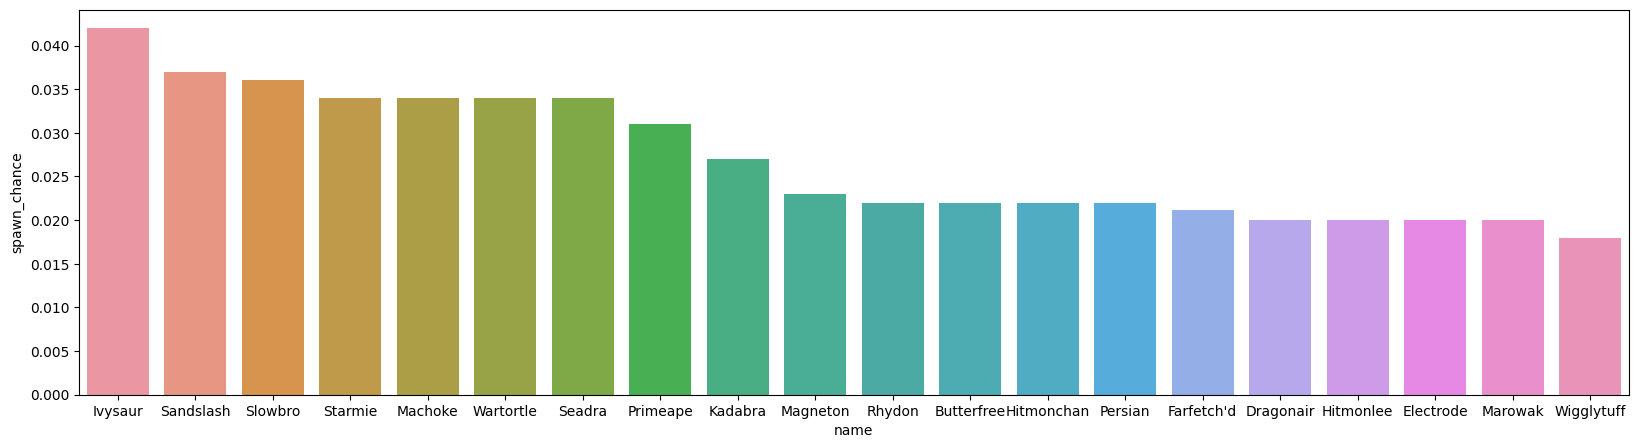

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'name', y = 'spawn_chance',data = spawn_rate[:20])
plt.show()

In [ ]:
# Get all Pokemons that have less than 4 weaknesses
df['weakness len'] = df.weaknesses.apply(len)

In [ ]:
weakness = df[['name','weaknesses','weakness len']][df['weakness len'] < 4]

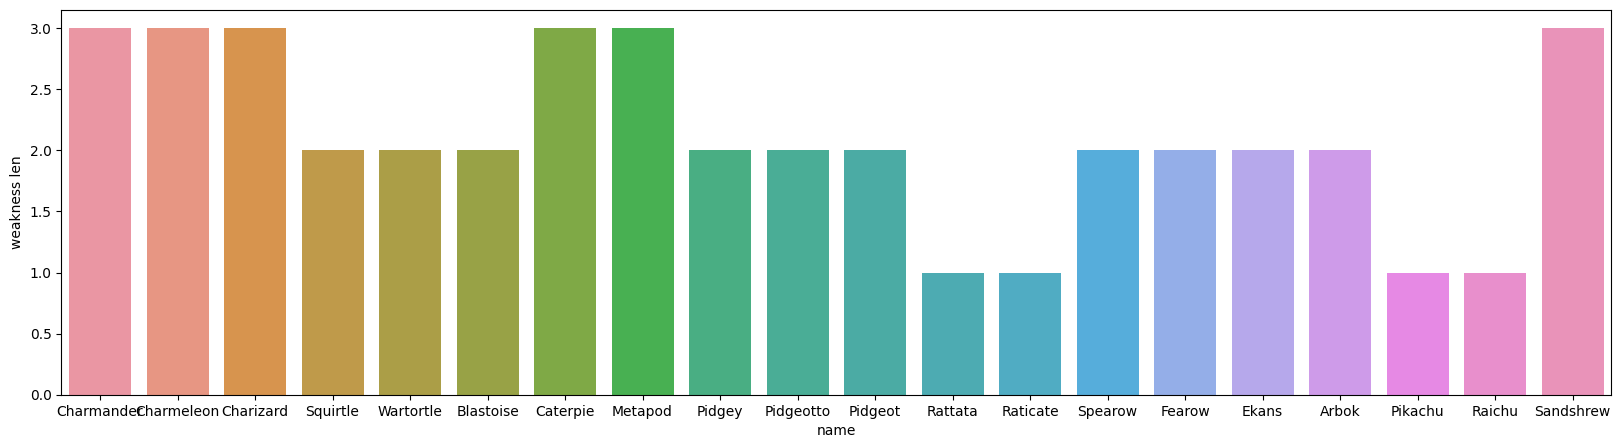

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'name', y = 'weakness len',data = weakness[:20])
plt.show()

In [ ]:
# Get all Pokemons that have no multipliers at all

df[['name','multipliers']][df['multipliers'] == 0]

,name,multipliers
2,Venusaur,0
5,Charizard,0
8,Blastoise,0
11,Butterfree,0
14,Beedrill,0
...,...,...
144,Zapdos,0
145,Moltres,0
148,Dragonite,0
149,Mewtwo,0


In [ ]:
# Get all Pokemons whose spawn time is less than 300 seconds.

# creating seconds column
df['spawn_seconds'] = (df['spawn_time'] - df['spawn_time'].min()).dt.total_seconds()

# Filtering Data

df[['name','spawn_seconds']][df['spawn_seconds'] < 300]

,name,spawn_seconds
6,Squirtle,265.0
8,Blastoise,6.0
10,Metapod,131.0
12,Weedle,141.0
13,Kakuna,150.0
...,...,...
143,Articuno,0.0
144,Zapdos,0.0
145,Moltres,0.0
149,Mewtwo,0.0


In [ ]:
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness len,spawn_seconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,1900-01-01 00:20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",0,4,1200.0
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99,13.0,Bulbasaur Candy,100,0.0,0.042,4,1900-01-01 00:07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,420.0


In [ ]:
# Get all Pokemon who have more than two types of capabilities

df['type len'] = df.type.apply(len)

df[['name','type len']][df['type len'] > 2]

,name,type len


There are no records having more than two types of capabilities